In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, Conv2D, Flatten
from tensorflow.keras.models import Model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Data

In [ ]:
df = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = df.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
#Scaling
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [ ]:
#Lets see some Images
def image_show(my_df, label):
  n = np.random.randint(0,60000)
  plt.figure(figsize=(2,2))
  plt.imshow(my_df[n], cmap="gray")
  print(f"label: {label[n]}")

label: 0


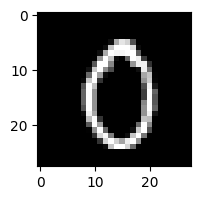

In [ ]:
image_show(x_train, y_train)

In [ ]:
#K value.
k = len(set(y_train))
k

10

In [ ]:
#Reshaping Input dataset.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [ ]:
#Architecture.
i = Input(x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation="relu")(i)
x = Conv2D(64, (3,3), strides=2, activation="relu")(x)
x = Conv2D(128, (3,3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(k, activation="softmax")(x)

In [ ]:
model = Model(i,x)

In [ ]:
#Compilation
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#Training the model.
r = model.fit(x_train, y_train, validation_split=0.2, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 21s 7ms/step - loss: 0.2050 - accuracy: 0.9360 - val_loss: 0.0938 - val_accuracy: 0.9727
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0754 - accuracy: 0.9765 - val_loss: 0.0568 - val_accuracy: 0.9821
Epoch 3/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0557 - accuracy: 0.9824 - val_loss: 0.0552 - val_accuracy: 0.9841
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0436 - accuracy: 0.9860 - val_loss: 0.0561 - val_accuracy: 0.9833
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0345 - accuracy: 0.9886 - val_loss: 0.0482 - val_accuracy: 0.9863
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0290 - accuracy: 0.9904 - val_loss: 0.0502 - val_accuracy: 0.9858
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0256 - accuracy: 0.9913 - val_loss: 0.0490 - val_accuracy

In [ ]:
def plots(r, of="both"):
  if of == "acc":
    plt.figure(figsize=(15,8))
    plt.plot(r.history["accuracy"], label="acc")
    plt.plot(r.history["val_accuracy"], label="val_acc")
    plt.show()
  elif of=="error":
    plt.figure(figsize=(15,8))
    plt.plot(r.history["loss"], label="loss")
    plt.plot(r.history["val_loss"], label="val_loss")
    plt.show()
  else:
    plots(r, of="acc")
    plots(r, of="error")

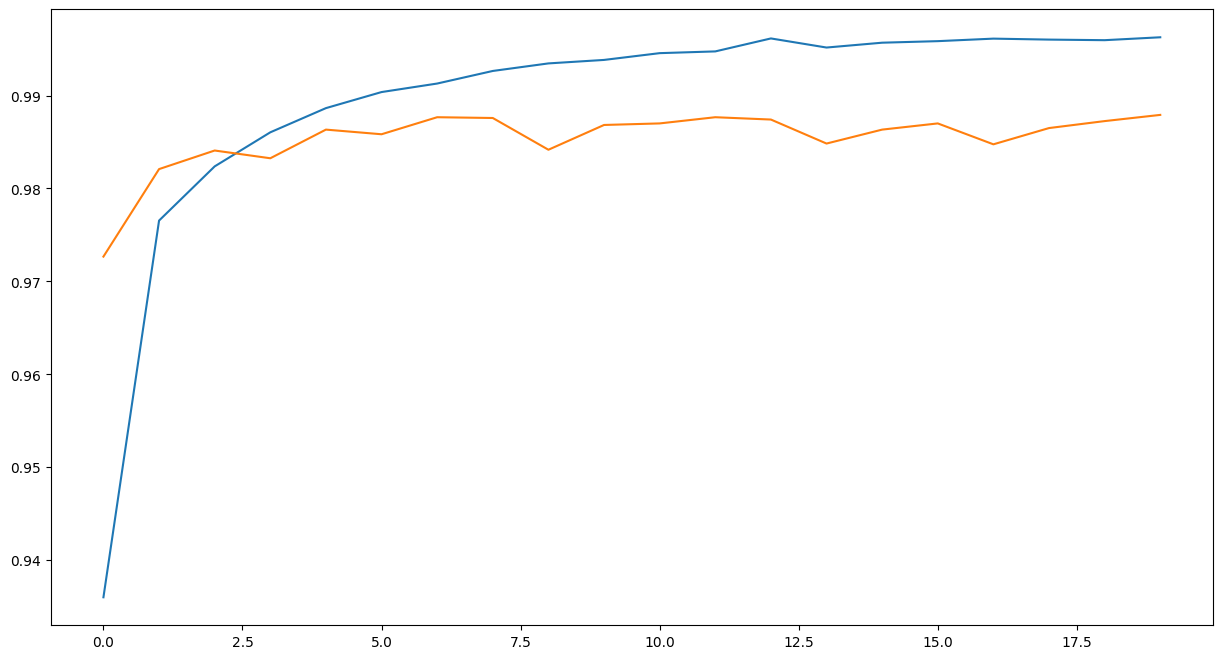

In [ ]:
plots(r, "acc")

# Testing.

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
def label_ypred(y_pred):
  index_ = []
  for i in range(0,len(y_pred)):
    index_.append(np.where(np.max(y_pred[i])==y_pred[i])[0][0])
  return index_

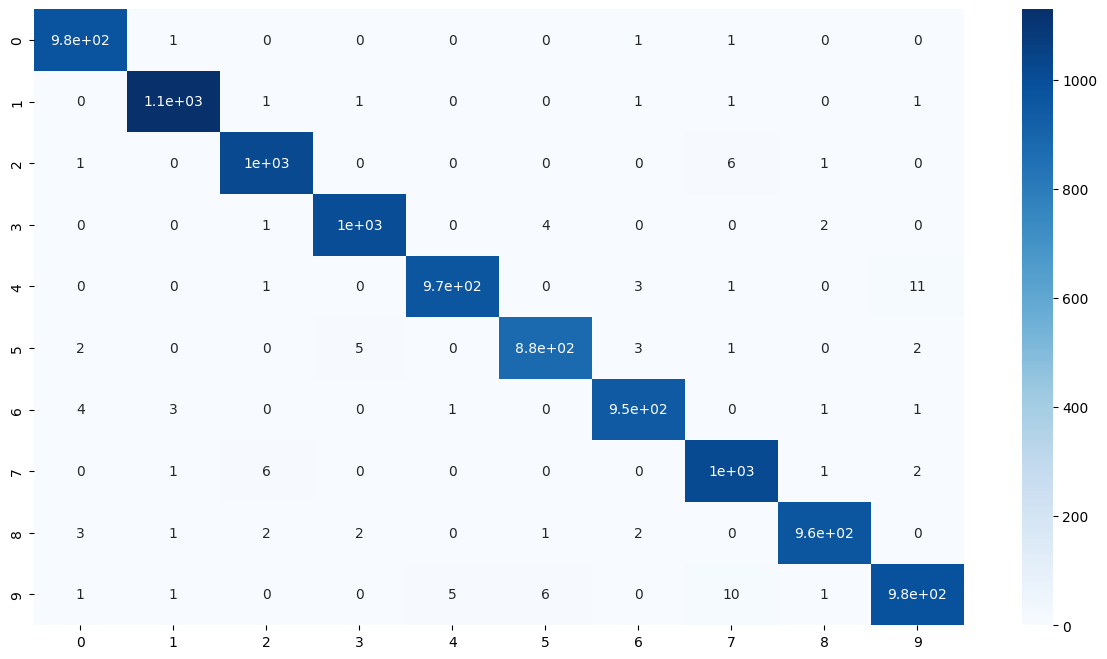

In [ ]:
y_pred_lb = label_ypred(y_pred)
cm = confusion_matrix(y_test, y_pred_lb)
plt.figure(figsize=(15,8))
sns.heatmap(cm, cmap="Blues", annot=True)
plt.show()

In [ ]:
precision = round(precision_score(y_test, y_pred_lb, average="micro"),2)
recall = round(recall_score(y_test, y_pred_lb, average="micro"),2)

In [ ]:
print(f"Accuracy: {round(accuracy_score(y_test, y_pred_lb),2)}")
print(f"Precision: {precision}")
print(f"Precision: {recall}")

Accuracy: 0.99
Precision: 0.99
Precision: 0.99
